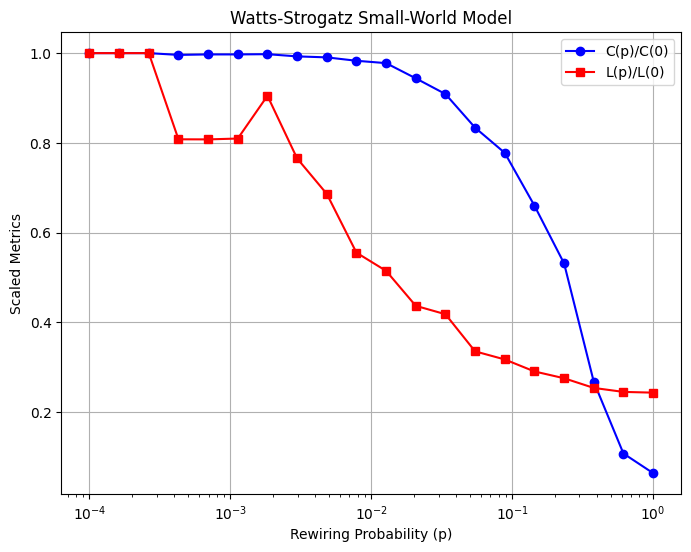

In [13]:
import random
import math
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

def initialize_ring_lattice(n, k):
    if k % 2 != 0:
        raise ValueError("k must be even.")
    adjacency = [set() for _ in range(n)]
    half_k = k // 2
    for i in range(n):
        for j in range(1, half_k + 1):
            neighbor_plus, neighbor_minus = (i + j) % n, (i - j) % n
            adjacency[i].update([neighbor_plus, neighbor_minus])
            adjacency[neighbor_plus].add(i)
            adjacency[neighbor_minus].add(i)
    return adjacency

def modify_edges(adjacency, k, p):
    n, half_k = len(adjacency), k // 2
    for i in range(n):
        for j in range(1, half_k + 1):
            neighbor = (i + j) % n
            if neighbor in adjacency[i] and random.random() < p:
                adjacency[i].remove(neighbor)
                adjacency[neighbor].remove(i)
                while True:
                    new_neighbor = random.randrange(n)
                    if new_neighbor != i and new_neighbor not in adjacency[i]:
                        break
                adjacency[i].add(new_neighbor)
                adjacency[new_neighbor].add(i)

def compute_clustering_coefficient(adjacency):
    total_clustering = 0.0
    for i, neighbors in enumerate(adjacency):
        k_i = len(neighbors)
        if k_i < 2:
            continue
        edges_among_neighbors = sum(1 for a in neighbors for b in neighbors if b in adjacency[a]) // 2
        total_clustering += (2.0 * edges_among_neighbors) / (k_i * (k_i - 1))
    return total_clustering / len(adjacency)

def compute_avg_path_length(adjacency):
    def bfs(source):
        visited, dist = {source}, {source: 0}
        queue = deque([source])
        while queue:
            u = queue.popleft()
            for v in adjacency[u]:
                if v not in visited:
                    visited.add(v)
                    dist[v] = dist[u] + 1
                    queue.append(v)
        return dist
    total_distance, pair_count = 0, 0
    for i in range(len(adjacency)):
        dist_map = bfs(i)
        for j in dist_map:
            if j != i:
                total_distance += dist_map[j]
                pair_count += 1
    return total_distance / pair_count

def generate_small_world_graph(n, k, p):
    adjacency = initialize_ring_lattice(n, k)
    modify_edges(adjacency, k, p)
    return adjacency

n, k, p_values = 200, 10, np.logspace(-4, 0, num=20)#[0.0001, 0.001, 0.01, 0.1, 1.0]
adjacency_base = initialize_ring_lattice(n, k)
C0, L0 = compute_clustering_coefficient(adjacency_base), compute_avg_path_length(adjacency_base)
C_scaled, L_scaled = [], []
for p in p_values:
    adjacency = generate_small_world_graph(n, k, p)
    C_scaled.append(compute_clustering_coefficient(adjacency) / C0)
    L_scaled.append(compute_avg_path_length(adjacency) / L0)
plt.figure(figsize=(8,6))
plt.plot(p_values, C_scaled, 'bo-', label='C(p)/C(0)')
plt.plot(p_values, L_scaled, 'rs-', label='L(p)/L(0)')
plt.xscale('log')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Scaled Metrics')
plt.title('Watts-Strogatz Small-World Model')
plt.grid(True)
plt.legend()
plt.show()
